In [123]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
m1 = np.random.randint(101)
m2 = np.random.randint(101)
s = 5
test = np.random.normal(m1,s,100)
test2 = np.random.normal(m2,s,100)

m1 = np.random.randint(101)
m2 = np.random.randint(101)
test3 = np.random.normal(m1,s,100)
test4 = np.random.normal(m2,s,100)


total1 = np.concatenate((test, test3), axis=0)
total2 = np.concatenate((test2, test4), axis=0)

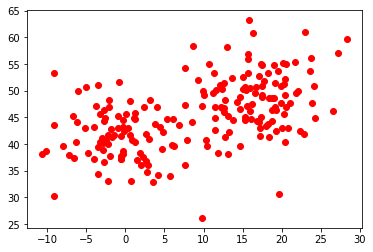

In [3]:
plt.plot(total1,total2,'ro')
plt.show()

# Creating Data

In [31]:
def create_data(m_random_low,m_random_high,s,csize,size):
    m1 = random.randint(m_random_low,m_random_high)
    m2 = random.randint(m_random_low,m_random_high)
    total1 = np.random.normal(m1,s,size)
    total2 = np.random.normal(m2,s,size)
    for i in range(1,csize):
        m1 = random.randint(m_random_low,m_random_high)
        m2 = random.randint(m_random_low,m_random_high)
        test1 = np.random.normal(m1,s,size)
        test2 = np.random.normal(m2,s,size)


        total1 = np.concatenate((total1, test1), axis=0)
        total2 = np.concatenate((total2, test2), axis=0)
    return total1,total2

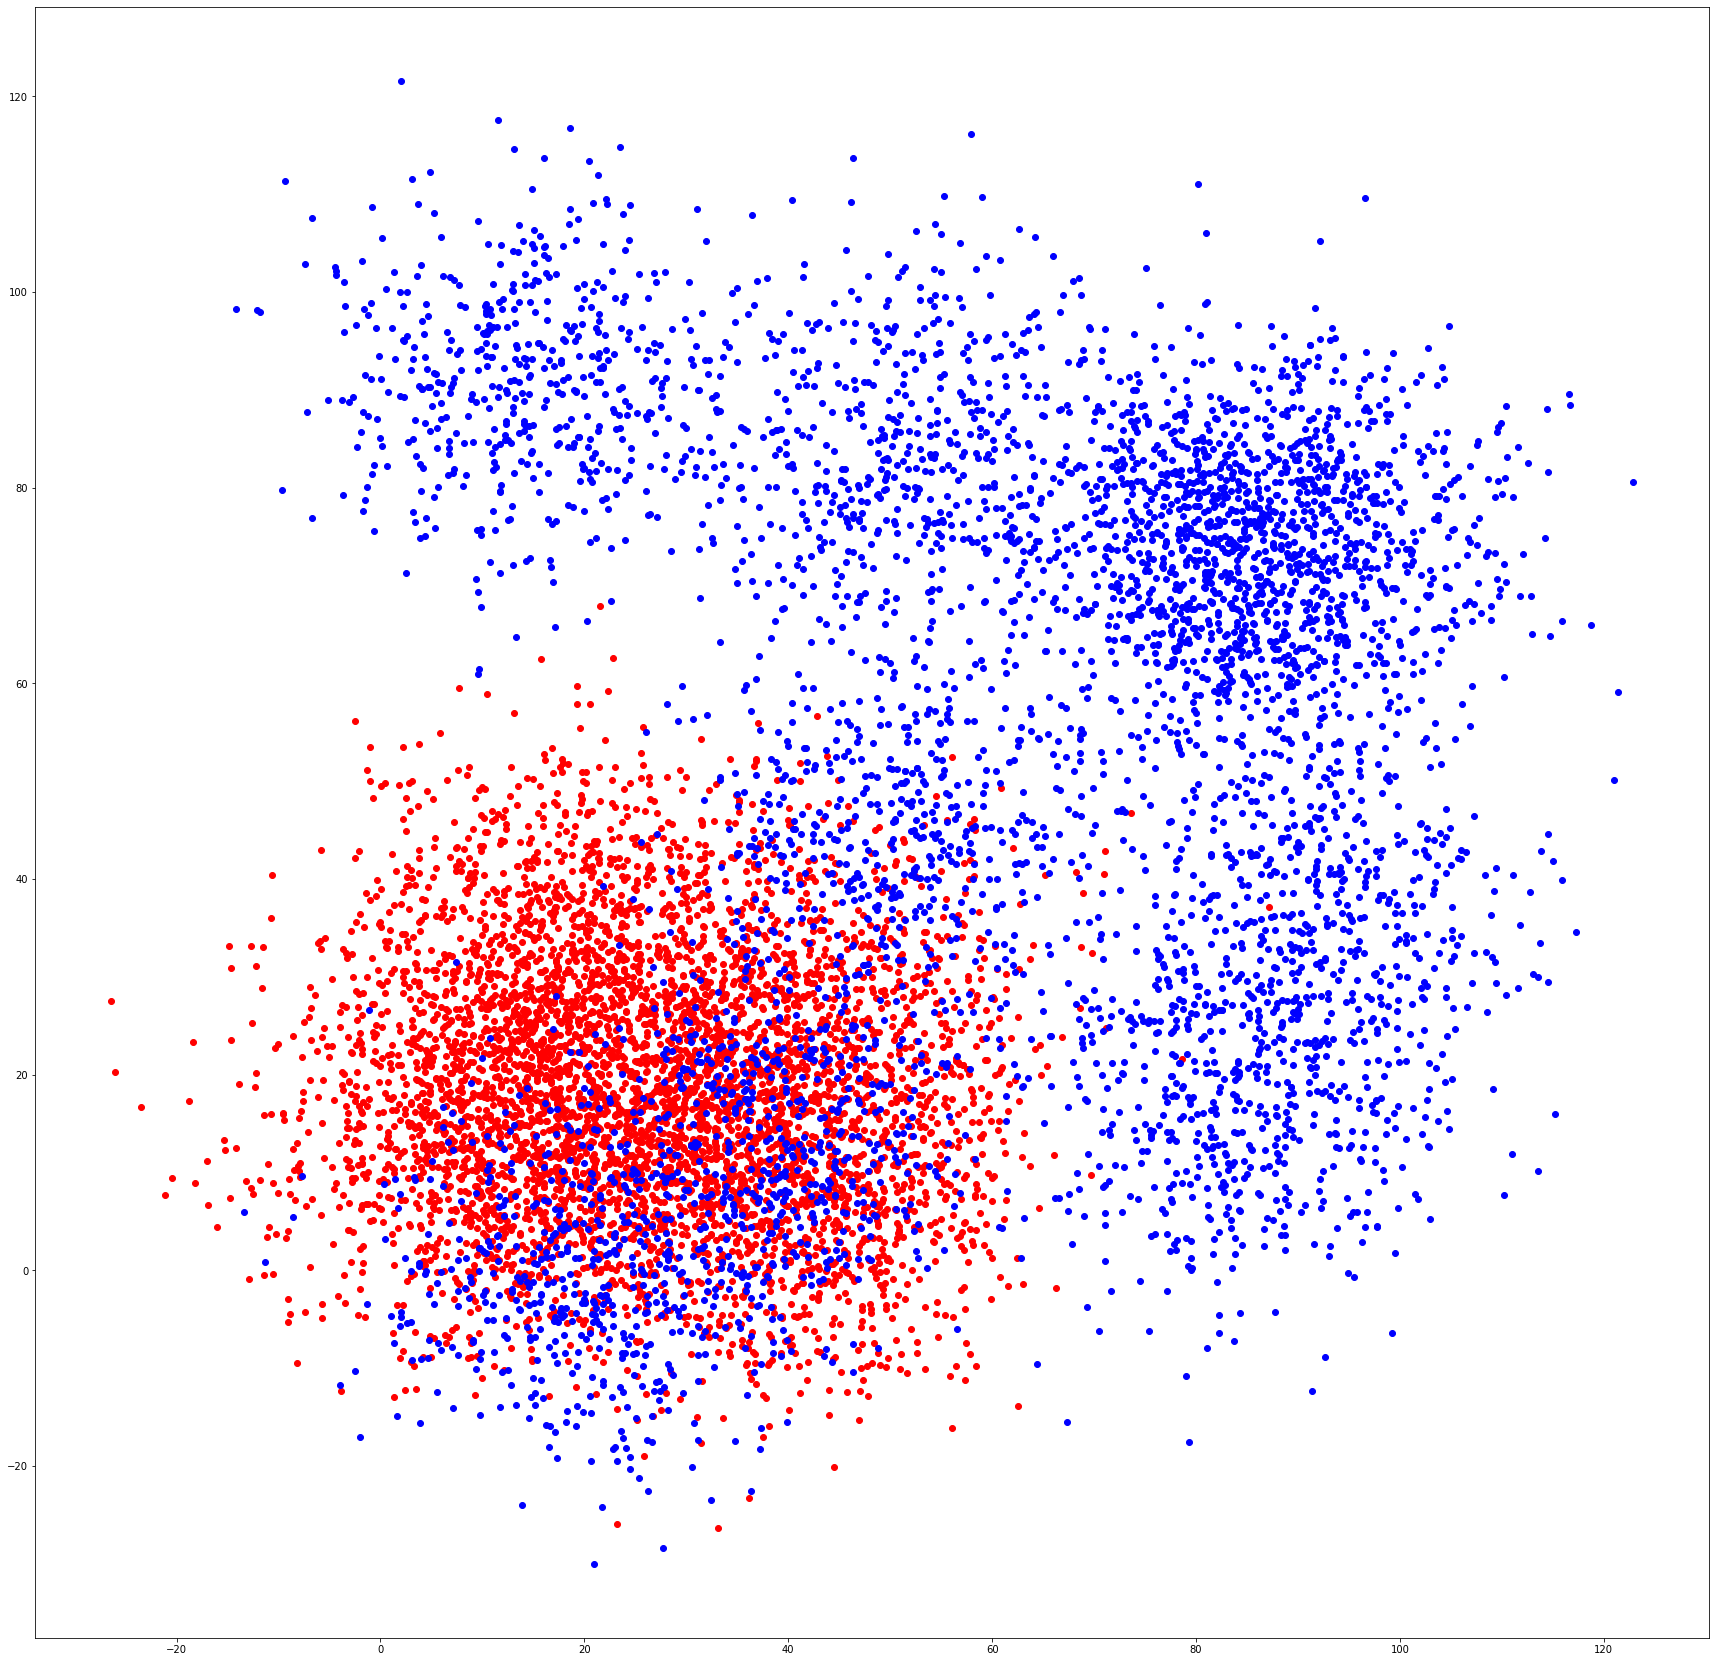

In [156]:
x1, x2 = create_data(0,50,10,10,510)
y1, y2 = create_data(0,100,10,10,510)
fig, axes = plt.subplots(1, 1)
plt.plot(x1,x2,'ro')
plt.plot(y1,y2,'bo')
fig.set_size_inches(30, 30)
plt.savefig('fig1.jpg')
plt.show()

In [157]:
data_X = np.zeros((10200,2))
data_y = np.zeros((10200,1))

In [158]:
data_X[0:5100,0] = x1
data_X[0:5100,1] = x2
data_X[5100:,0] = y1
data_X[5100:,1] = y2
data_y[0:5100] = 0
data_y[5100:] = 1

In [159]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=(200/10200), random_state=42)

In [160]:
X_test.shape

(200, 2)

# Linear Regression

In [161]:
regr = linear_model.LinearRegression()

In [162]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
error = 0
for i,test in  enumerate(X_test):
    predict = regr.predict([test])[0][0]
    if predict < .5:
        predict_score = 0.0
    else:
        predict_score = 1.0
    real_score = y_test[i][0]
    
    if real_score != predict_score:
        error += 1
print(error/200)

0.16


In [164]:
regr.coef_

array([[0.00752716, 0.0062282 ]])

In [165]:
regr.intercept_

array([-0.04329639])

In [166]:
x_plot = np.arange(start=-20, stop=120, step=.1)
y_plot = (.5 - regr.intercept_[0] - (x_plot * regr.coef_[0][0])) /  regr.coef_[0][1]

In [167]:
X_train[:,0]

array([37.59164848, 16.80753387, 25.50763953, ..., 49.24492747,
        6.27968942, 78.73178501])

In [168]:
x1

array([45.62845343, 35.15977876, 59.03506257, ..., 50.74900648,
       38.12838597, 37.53896703])

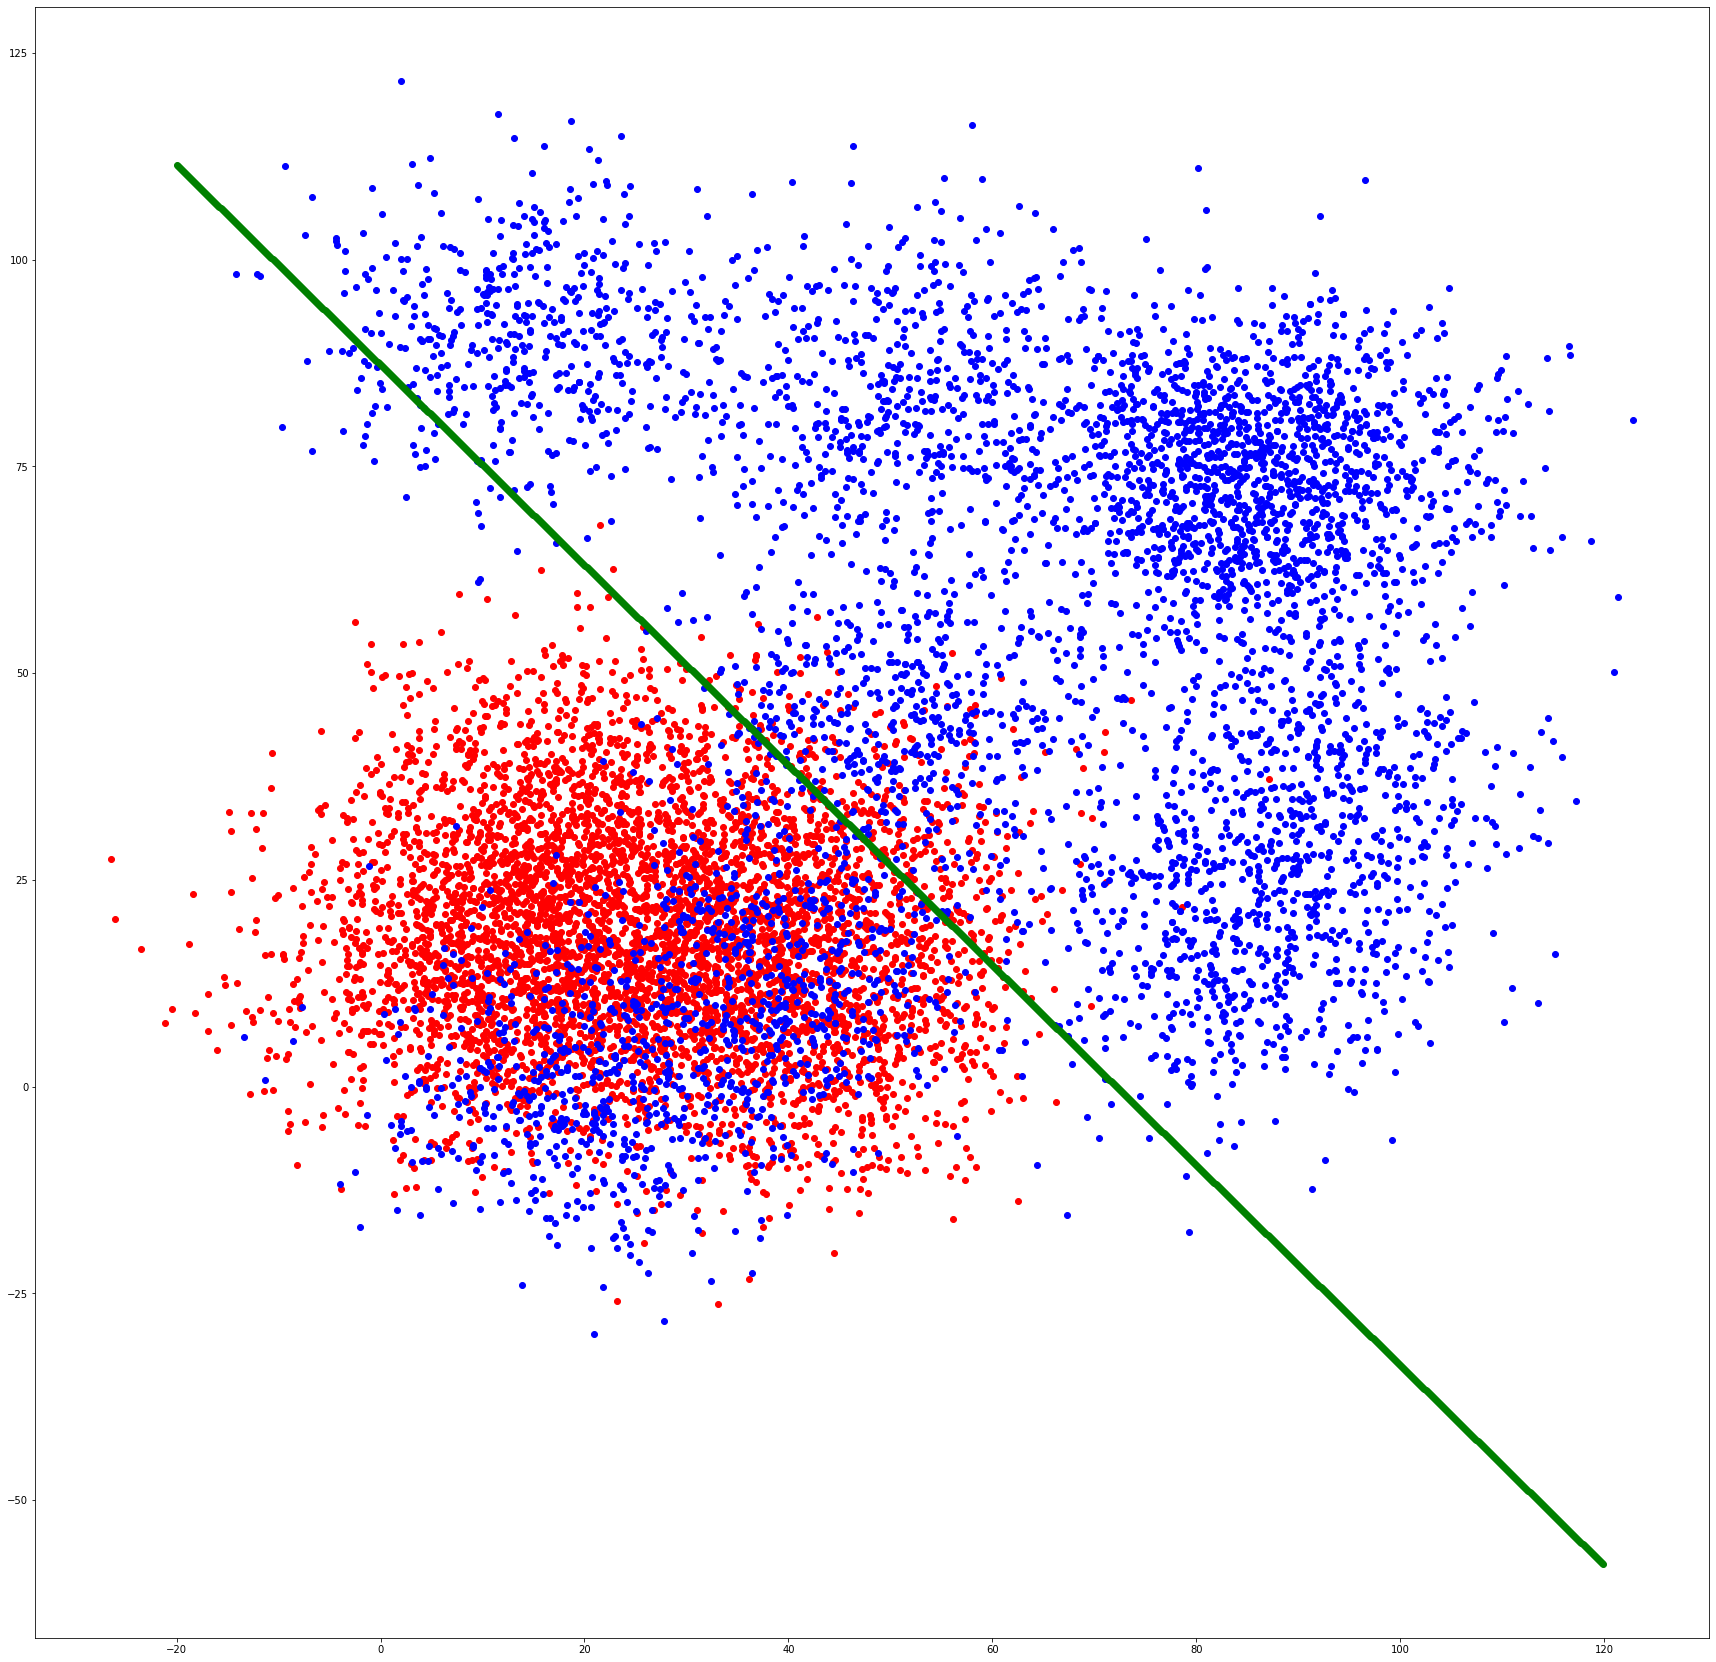

In [169]:
fig, axes = plt.subplots(1, 1)
#plt.plot(x1,x2,'ro')
#plt.plot(y1,y2,'bo')
plt.plot(x1,x2,'ro')
plt.plot(y1,y2,'bo')
plt.plot(x_plot,y_plot,'go')
fig.set_size_inches(30, 30)
plt.savefig('fig1.jpg')
plt.show()

# Quadratic Regression

In [170]:
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
X_train[0]

array([37.59164848, 24.52724282])

In [172]:
lin_reg_2.predict(poly_reg.fit_transform([X_train[0]]))

array([[0.2874812]])

In [173]:
error = 0
for i,test in  enumerate(X_test):
    predict = lin_reg_2.predict(poly_reg.fit_transform([test]))[0][0]#regr.predict([test])[0][0]
    if predict < .5:
        predict_score = 0.0
    else:
        predict_score = 1.0
    real_score = y_test[i][0]
    
    if real_score != predict_score:
        error += 1
print(error/200)

0.16


# kNN

In [174]:
data_X.shape

(10200, 2)

In [175]:
data = np.zeros(shape = (10200,3))
data[:,0:2] = data_X
data[:,2:] = data_y
data

array([[45.62845343, 11.59561733,  0.        ],
       [35.15977876, 43.54490097,  0.        ],
       [59.03506257, 23.69722441,  0.        ],
       ...,
       [85.69795972, 92.30372009,  1.        ],
       [83.79697887, 64.08817854,  1.        ],
       [78.34729179, 75.74142725,  1.        ]])

In [176]:
np.random.shuffle(data)
data

array([[ 83.5489634 ,  88.04564166,   1.        ],
       [ 38.34977387,  24.94594617,   0.        ],
       [ 54.92714045,  91.37053102,   1.        ],
       ...,
       [ 25.29554911,   4.33797309,   1.        ],
       [ 91.33112664, -12.31585391,   1.        ],
       [ 13.90513881,  17.32233377,   0.        ]])

In [177]:
#cv 10 function
num = int(10200/10)
k_dict = {}
for k in range(1,101):
    total_score = 0
    for i in range(1,11):
        X_test = np.zeros(shape = (num,2))
        y_test = np.zeros(shape = (num,1))
        X_train = np.zeros(shape = (num * 9,2))
        y_train = np.zeros(shape = (num * 9,1))
        if i == 1:
            X_test = data[0:num,0:2]
            y_test = data[0:num,2:]
            X_train = data[num:,0:2]
            y_train = data[num:,2:]
            neigh = KNeighborsClassifier(n_neighbors= k)
            neigh.fit(X_train, y_train)
            score = neigh.score(X_test, y_test, sample_weight=None)
            total_score += score
            #print(score)

        else:
            X_test = data[num * (i-1):num * i,0:2]
            y_test = data[num * (i-1):num * i,2:]
            X_train[:num * (i-1), 0:2] = data[:num * (i-1), 0:2]
            X_train[num * (i-1):, 0:2] = data[num * i:, 0:2]
            y_train[:num * (i-1),:] = data[:num * (i-1), 2:]
            y_train[num * (i-1):,:] = data[num * i:, 2:]
            neigh = KNeighborsClassifier(n_neighbors= k)
            neigh.fit(X_train, y_train)
            score = neigh.score(X_test, y_test, sample_weight=None)
            total_score += score
            #print(score)
    k_dict[k] = 1- (total_score/10)
    

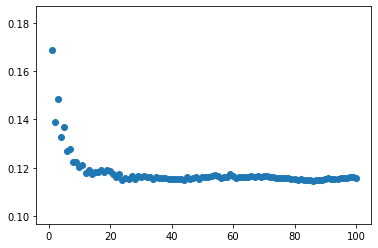

In [178]:
x = k_dict.keys()
y = k_dict.values()
plt.scatter(x,y)
plt.show()